<a href="https://colab.research.google.com/github/lalitmendhule/Deep-Learning/blob/main/Prac3_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gradient Descent parameters (θ0, θ1): [153.39298836 199.72393333]
Gradient Descent MSE: 4716.855348115728
Gradient Descent R²: 0.10971682729994048


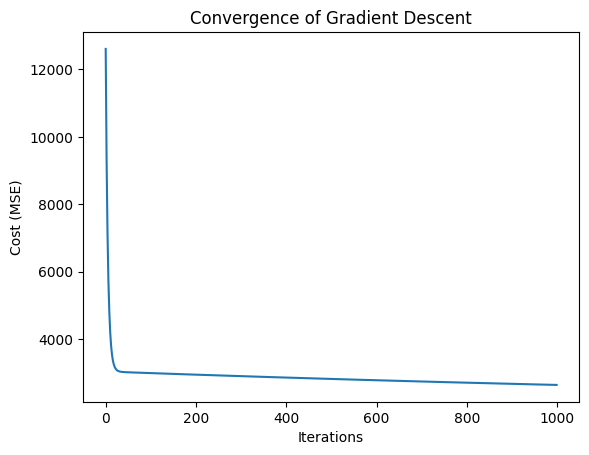

Normal Equation parameters (θ0, θ1): [152.00335421 998.57768914]
Normal Equation MSE: 4061.8259284949268
Normal Equation R²: 0.23335039815872138


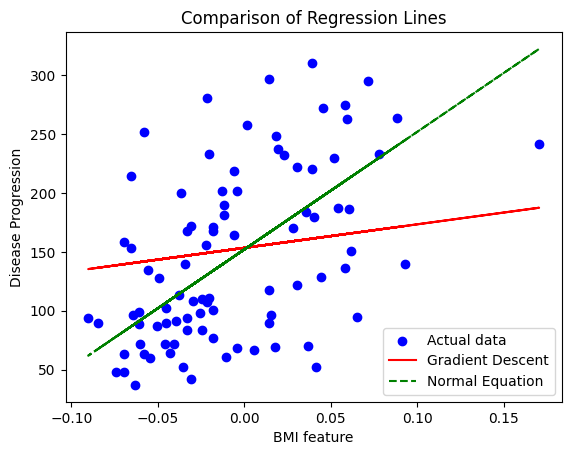

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load diabetes dataset
data = load_diabetes()
X = data.data[:, np.newaxis, 2]   # BMI feature (3rd column)
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add bias term (intercept)
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Gradient Descent Parameters
alpha = 0.1   # learning rate
n_iters = 1000
m = len(y_train)

# Initialize theta
theta = np.zeros(2)
cost_history = []

# Gradient Descent loop
for i in range(n_iters):
    gradients = (1/m) * X_train_b.T.dot(X_train_b.dot(theta) - y_train)
    theta -= alpha * gradients
    cost = (1/(2*m)) * np.sum((X_train_b.dot(theta) - y_train)**2)
    cost_history.append(cost)

print("Gradient Descent parameters (θ0, θ1):", theta)

# Predictions with GD
y_pred_gd = X_test_b.dot(theta)

# Performance metrics for GD
mse_gd = mean_squared_error(y_test, y_pred_gd)
r2_gd = r2_score(y_test, y_pred_gd)

print("Gradient Descent MSE:", mse_gd)
print("Gradient Descent R²:", r2_gd)

# Plot convergence
plt.plot(range(n_iters), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Convergence of Gradient Descent")
plt.show()

# Closed-form solution (Normal Equation)
theta_normal = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)
print("Normal Equation parameters (θ0, θ1):", theta_normal)

# Predictions with Normal Equation
y_pred_ne = X_test_b.dot(theta_normal)

# Performance metrics for Normal Equation
mse_ne = mean_squared_error(y_test, y_pred_ne)
r2_ne = r2_score(y_test, y_pred_ne)

print("Normal Equation MSE:", mse_ne)
print("Normal Equation R²:", r2_ne)

# Compare models visually
plt.scatter(X_test, y_test, color="blue", label="Actual data")
plt.plot(X_test, y_pred_gd, color="red", label="Gradient Descent")
plt.plot(X_test, y_pred_ne, color="green", linestyle="dashed", label="Normal Equation")
plt.xlabel("BMI feature")
plt.ylabel("Disease Progression")
plt.legend()
plt.title("Comparison of Regression Lines")
plt.show()